### How does a playlist’s genre diversity affect its popularity?

In [60]:
import os
import json
import pickle
from collections import defaultdict
from collections import Counter
import numpy as np
import matplotlib.pyplot
import matplotlib.axes
import matplotlib.colors
import math

In [21]:
# MPD = 'mpd/'
MPD = r'C:\Users\19142\Documents\gpjDATA\mpd\data'
playlist_files = [os.path.join(MPD, x) for x in os.listdir(MPD)]

In [22]:
# SONG_DATA = 'mappings/songs'
SONG_DATA = r'C:\Users\19142\Documents\gpjDATA\mappings\songs'
song_files = [os.path.join(SONG_DATA, x) for x in os.listdir(SONG_DATA)]

In [23]:
ARTIST_DATA = r'C:\Users\19142\Documents\gpjDATA\mappings\artists\artist_matching.pkl'
with open(ARTIST_DATA, 'rb') as fp:
    artist_dict = pickle.load(fp)

In [24]:
all_genres = set()
for ID, artist in artist_dict.items():
    all_genres.update(artist['genres'])
genres = list(all_genres)
genres.sort()
genre_to_ix = {g:ix for ix,g in enumerate(genres)}
ix_to_genre = {ix:g for ix,g in enumerate(genres)}
N = len(genres)
ideal_dist = np.ones(N)*1/N

In [25]:
N

5604

In [ ]:
# Note: Here we compute this pet track but we can also take list with all genres in playlist as a whole

def calculate_playlist_vector(genres_per_track, dim=N, g_ix=genre_to_ix):
    k = len(genres_per_track) # weight uniformly across tracks
    dist = np.zeros(dim)
    for track_genres in genres_per_track:
        q = len(track_genres) # weight uniformly across genres per track
        for genre in track_genres:
            ix = g_ix[genre]
            dist[ix] += (1/k)*(1/q)
    return dist

In [ ]:
songID_to_genres = defaultdict(list)
for file in song_files:
    with open(file, 'rb') as fp:
        data = pickle.load(fp)
    for songID,song in data.items():
        genres_list = []
        for artist in song['artists']:
            artistID = artist['id']
            genres = artist_dict[artistID]['genres']
            genres_list.extend(genres) # Note: by doing this we allow repeating
        songID_to_genres[songID] = genres_list

In [ ]:
list(songID_to_genres.items())[:5]

[('spotify:track:207gfhp3B7lMw2XFh1CiPv',
  ['chicano rap',
   'latin hip hop',
   'chicano rap',
   'latin hip hop',
   'mexican hip hop',
   'narco rap',
   'rap underground mexicano']),
 ('spotify:track:6JTt4Q7sNkIbMf3BckhaZ8', ['lounge house']),
 ('spotify:track:30Qb5NWSiISP6OQPgN8yaZ', []),
 ('spotify:track:753chPZ7c42nJEE3agfPMS',
  ['jam band', 'jamgrass', 'progressive bluegrass']),
 ('spotify:track:4b84UzDfOmLDtGSssTQNg4', ['canadian folk'])]

In [ ]:
playlist_data = {}
for file in playlist_files:
   # assert os.path.isfile(file) 
    with open(file, 'rb') as fp:
        data = json.load(fp)
    for playlist in data['playlists']:
        empty = False
        ID = playlist['pid']
        genres_per_track = []
        for track in playlist['tracks']:
            tID = track['track_uri']
            if len(songID_to_genres[tID]) != 0:
                genres_per_track.append(songID_to_genres[tID])
            else:
                empty = True
                break
        if empty:
            continue
        followers = playlist['num_followers']
        dist = calculate_playlist_vector(genres_per_track)
        diversity = np.linalg.norm(ideal_dist - dist,2)
        playlist_data[ID] = (diversity, followers)

In [ ]:
list(playlist_data.items())[:5]

[(0, (0.2520624269912687, 1)),
 (1, (0.2257691627487026, 1)),
 (2, (0.52804439667569, 1)),
 (4, (0.24650003174155238, 2)),
 (6, (0.19931127627620715, 1))]

In [ ]:
with open(r'C:\Users\19142\Documents\gpjDATA\mappings\Q1\playlist_data.pkl', 'wb') as fp:
    pickle.dump(playlist_data, fp)

In [ ]:
list(playlist_data.items())[:5]

[(0, (0.2520624269912687, 1)),
 (1, (0.2257691627487026, 1)),
 (2, (0.52804439667569, 1)),
 (4, (0.24650003174155238, 2)),
 (6, (0.19931127627620715, 1))]

Text(0, 0.5, 'Number of Followers')

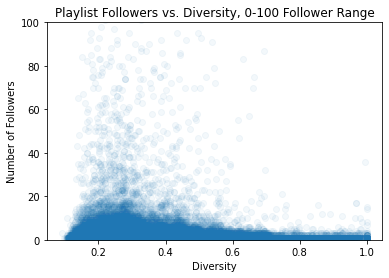

In [73]:
type(playlist_data.values())
# print(playlist_data.values())
xFollows = []
yDiversity = []
for pairs in playlist_data.values():
    xFollows.append(pairs[0])
    yDiversity.append(pairs[1])

matplotlib.pyplot.scatter(xFollows, yDiversity, alpha=.05)
matplotlib.pyplot.ylim(0, 100)
matplotlib.pyplot.title("Playlist Followers vs. Diversity, 0-100 Follower Range")
matplotlib.pyplot.xlabel("Diversity")
matplotlib.pyplot.ylabel("Number of Followers")

Text(0, 0.5, 'Number of Followers')

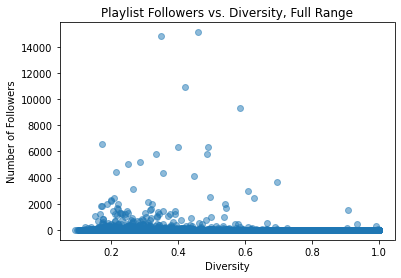

In [76]:
type(playlist_data.values())
# print(playlist_data.values())
xFollows = []
yDiversity = []
for pairs in playlist_data.values():
    xFollows.append(pairs[0])
    yDiversity.append(pairs[1])

matplotlib.pyplot.scatter(xFollows, yDiversity, alpha=.5)
# matplotlib.pyplot.ylim(0, 100)
matplotlib.pyplot.title("Playlist Followers vs. Diversity, Full Range")
matplotlib.pyplot.xlabel("Diversity")
matplotlib.pyplot.ylabel("Number of Followers")

Text(0, 0.5, 'Number of Followers')

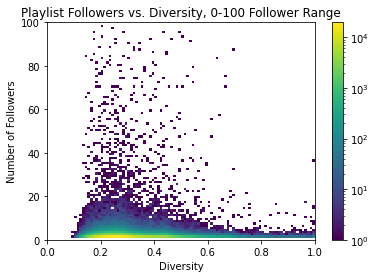

In [72]:
type(playlist_data.values())
# print(playlist_data.values())
xFollows = []
yDiversity = []
for pairs in playlist_data.values():
    xFollows.append(pairs[0])
    yDiversity.append(pairs[1])
fig, ax = matplotlib.pyplot.subplots()

hi = ax.hist2d(x=xFollows, y=yDiversity, bins=100,range=[[0,1],[0,100]], norm = matplotlib.colors.LogNorm())

fig.colorbar(hi[3], ax=ax)
#ax.hist2d(x=xFollows, y=yDiversity, bins=10000)

# matplotlib.pyplot.ylim(0, 100)

matplotlib.pyplot.title("Playlist Followers vs. Diversity, 0-100 Follower Range")
matplotlib.pyplot.xlabel("Diversity")
matplotlib.pyplot.ylabel("Number of Followers")

Text(0, 0.5, 'Number of Followers')

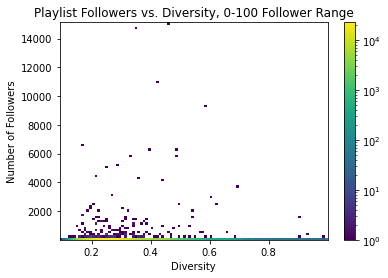

In [75]:
type(playlist_data.values())
# print(playlist_data.values())
xFollows = []
yDiversity = []
for pairs in playlist_data.values():
    xFollows.append(pairs[0])
    yDiversity.append(pairs[1])
fig, ax = matplotlib.pyplot.subplots()

hi = ax.hist2d(x=xFollows, y=yDiversity, bins=100, norm = matplotlib.colors.LogNorm())

fig.colorbar(hi[3], ax=ax)
#ax.hist2d(x=xFollows, y=yDiversity, bins=10000)

# matplotlib.pyplot.ylim(0, 100)

matplotlib.pyplot.title("Playlist Followers vs. Diversity, 0-100 Follower Range")
matplotlib.pyplot.xlabel("Diversity")
matplotlib.pyplot.ylabel("Number of Followers")

409039


Text(0, 0.5, 'Number of Playlists (Total = 409039)')

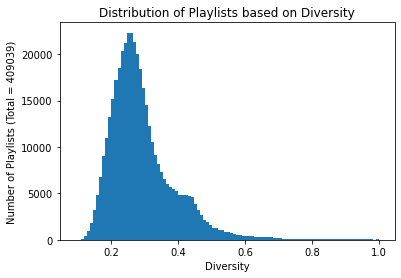

In [41]:
valz = [] 
county = 0
for pairs in playlist_data.values():
    valz.append(pairs[0])
    county += 1

print(county)


#div_hist = matplotlib.pyplot.figure()
the_hist = matplotlib.pyplot.hist(valz, bins=100)
matplotlib.pyplot.title("Distribution of Playlists based on Diversity")
matplotlib.pyplot.xlabel("Diversity")
matplotlib.pyplot.ylabel("Number of Playlists (Total = 409039)")
#div_hist.add_subplot(the_hist)


# ------------below is v2 diversity, it seems basically the same, can prob just do option 1 -----------


In [ ]:

def custom_ideal_vector(genres_per_track, dim=N, g_ix=genre_to_ix):
    dist = np.zeros(dim)
    for track_genres in genres_per_track:
        for genre in track_genres:
            ix = g_ix[genre]
            dist[ix] = 1
    dist = dist * 1/(np.count_nonzero(dist))
    return dist 

In [ ]:
playlist_dataV2 = {}
for file in playlist_files:
   # assert os.path.isfile(file) 
    with open(file, 'rb') as fp:
        data = json.load(fp)
    for playlist in data['playlists']:
        empty = False
        ID = playlist['pid']
        genres_per_track = []
        for track in playlist['tracks']:
            tID = track['track_uri']
            if len(songID_to_genres[tID]) != 0:
                genres_per_track.append(songID_to_genres[tID])
            else:
                empty = True
                break
        if empty:
            continue
        followers = playlist['num_followers']
        dist = calculate_playlist_vector(genres_per_track)
        custom_ideal_dist = custom_ideal_vector(genres_per_track)
        diversity = np.linalg.norm(custom_ideal_dist - dist,2)
        playlist_dataV2[ID] = (diversity, followers)

(0.0, 100.0)

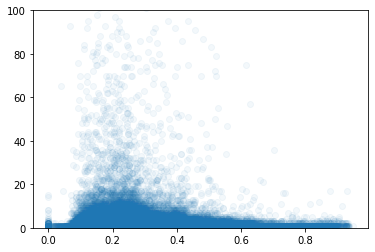

In [ ]:
type(playlist_data.values())
# print(playlist_data.values())
xFollowsV2 = []
yDiversityV2 = []
for pairs in playlist_dataV2.values():
    xFollowsV2.append(pairs[0])
    yDiversityV2.append(pairs[1])

matplotlib.pyplot.scatter(xFollowsV2, yDiversityV2, alpha=.05)
matplotlib.pyplot.ylim(0, 100)